In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv(r"D:\ML Projects\Big Mart Sales\train.csv")
test = pd.read_csv(r"D:\ML Projects\Big Mart Sales\test.csv")
sub = test[['Item_Identifier','Outlet_Identifier']]

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


<AxesSubplot:>

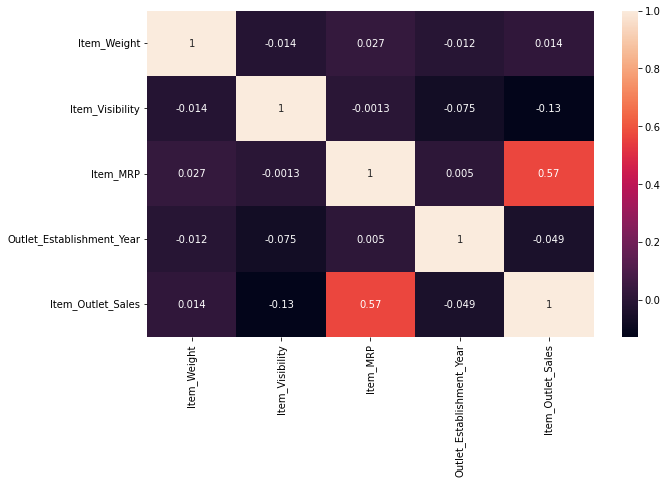

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot =True)

In [212]:
train['Outlet_Establishment_Year'] = train['Outlet_Establishment_Year'] - 1984
train['Outlet_Establishment_Year']

0       15
1       25
2       15
3       14
4        3
        ..
8518     3
8519    18
8520    20
8521    25
8522    13
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [213]:
categorical_col = [cname for cname in train.columns if
                  train[cname].nunique()<10 and 
                  train[cname].dtypes=='object']
categorical_col_test = [cname for cname in test.columns if
                       test[cname].nunique()<10 and
                       test[cname].dtypes == 'object']
numerical_col = [cname for cname in train.columns if
               train[cname].dtypes in ['int64','float64']]
numerical_col_test = [cname for cname in test.columns if
                     test[cname].dtypes in ['int64','float64']]


In [214]:
print(categorical_col)
print(categorical_col_test)
print(numerical_col)
print(numerical_col_test)
my_col = categorical_col + numerical_col
my_col_test = categorical_col_test + numerical_col_test
train = train[my_col].copy()
test = test[my_col_test].copy()

['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']


In [215]:
train.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,Low Fat,Medium,Tier 1,Supermarket Type1,9.30,0.016047,249.8092,15,3735.1380
1,Regular,Medium,Tier 3,Supermarket Type2,5.92,0.019278,48.2692,25,443.4228
2,Low Fat,Medium,Tier 1,Supermarket Type1,17.50,0.016760,141.6180,15,2097.2700
3,Regular,NaN,Tier 3,Grocery Store,19.20,0.000000,182.0950,14,732.3800
4,Low Fat,High,Tier 3,Supermarket Type1,8.93,0.000000,53.8614,3,994.7052


In [216]:
train.isnull().sum()

Item_Fat_Content                0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [217]:
print(train.Outlet_Size.mode())
print(test.Outlet_Size.mode())

0    Medium
dtype: object
0    Medium
dtype: object


In [218]:
train['Outlet_Size'].fillna('Medium',inplace =True)
test['Outlet_Size'].fillna('Medium',inplace =True)

In [219]:
train['Item_Weight'+'_mean_imputed_']=train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace =True)
test['Item_Weight'+'_mean_imputed_']=test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace =True)

train.drop(['Item_Weight_mean_imputed_'],axis=1,inplace=True)
test.drop(['Item_Weight_mean_imputed_'],axis=1,inplace=True)


In [220]:
train.isnull().sum()


Item_Fat_Content             0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [221]:
categorical_col

['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [222]:
print(train.Item_Fat_Content.unique())
print(test.Item_Fat_Content.unique())
print(train.Outlet_Size.unique())
print(test.Outlet_Size.unique())
print(train.Outlet_Location_Type.unique())
print(test.Outlet_Location_Type.unique())
print(train.Outlet_Type.unique())
print(test.Outlet_Type.unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
['Medium' 'High' 'Small']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 3' 'Tier 2']
['Tier 1' 'Tier 2' 'Tier 3']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']


In [223]:
mapping = {
    "Low Fat":1,
    "low fat":1,
    "LF":1,
    "Regular":2,
    "reg":2,
}

train.loc[:,"Item_Fat_Content"] = train["Item_Fat_Content"].map(mapping)
test.loc[:,"Item_Fat_Content"] = test["Item_Fat_Content"].map(mapping)

In [224]:
print(train.Item_Fat_Content.unique(),test.Item_Fat_Content.unique())

[1 2] [1 2]


In [225]:
mapping = {
    "Medium":2,
    "Small":1,
    "High":3,
}
train.loc[:,"Outlet_Size"] = train["Outlet_Size"].map(mapping)
test.loc[:,"Outlet_Size"] = test["Outlet_Size"].map(mapping)

In [226]:
print(train.Outlet_Size.unique(),test.Outlet_Size.unique())

[2 3 1] [2 1 3]


In [227]:
mapping = {
    "Tier 1":3,
    "Tier 2":2,
    "Tier 3":1,
}
train.loc[:,"Outlet_Location_Type"] = train["Outlet_Location_Type"].map(mapping)
test.loc[:,"Outlet_Location_Type"] = test["Outlet_Location_Type"].map(mapping)

In [228]:
print(train.Outlet_Location_Type.unique(),test.Outlet_Location_Type.unique())

[3 1 2] [3 2 1]


In [229]:
from sklearn.preprocessing import LabelEncoder
le_type = LabelEncoder()
le_type.fit(['Supermarket Type1' ,'Supermarket Type2' ,'Grocery Store','Supermarket Type3'])
train.Outlet_Type = le_type.transform(train['Outlet_Type'])
test.Outlet_Type = le_type.transform(test['Outlet_Type'])



In [230]:
train.describe()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,1.352693,1.829168,1.887129,1.201220,12.81342,0.066132,140.992782,13.831867,2181.288914
std,0.477836,0.600327,0.812757,0.796459,4.22724,0.051598,62.275067,8.371760,1706.499616
min,1.000000,1.000000,1.000000,0.000000,4.55500,0.000000,31.290000,1.000000,33.290000
25%,1.000000,1.000000,1.000000,1.000000,9.31000,0.026989,93.826500,3.000000,834.247400
50%,1.000000,2.000000,2.000000,1.000000,12.60000,0.053931,143.012800,15.000000,1794.331000
75%,2.000000,2.000000,3.000000,1.000000,16.00000,0.094585,185.643700,20.000000,3101.296400
max,2.000000,3.000000,3.000000,3.000000,21.35000,0.328391,266.888400,25.000000,13086.964800


In [231]:
test.describe()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,1.354339,1.829079,1.887168,1.201373,12.662023,0.065684,141.023273,1997.828903
std,0.478355,0.600328,0.812824,0.796740,4.245831,0.051252,61.809091,8.372256
min,1.000000,1.000000,1.000000,0.000000,4.555000,0.000000,31.990000,1985.000000
25%,1.000000,1.000000,1.000000,1.000000,9.195000,0.027047,94.412000,1987.000000
50%,1.000000,2.000000,2.000000,1.000000,12.500000,0.054154,141.415400,1999.000000
75%,2.000000,2.000000,3.000000,1.000000,15.850000,0.093463,186.026600,2004.000000
max,2.000000,3.000000,3.000000,3.000000,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:>

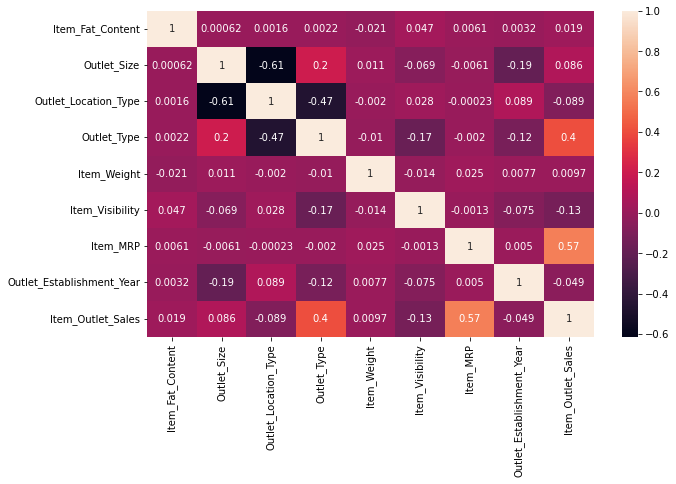

In [232]:
corr = train.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot =True)

In [233]:
train.drop(['Item_Weight'],axis=1,inplace = True)
test.drop(['Item_Weight'],axis=1,inplace = True)

train.drop(['Outlet_Location_Type'],axis=1,inplace = True)
test.drop(['Outlet_Location_Type'],axis=1,inplace = True)

train.drop(['Outlet_Establishment_Year'],axis=1,inplace = True)
test.drop(['Outlet_Establishment_Year'],axis=1,inplace = True)



In [234]:
X = train.drop(["Item_Outlet_Sales"],axis=1)
y = train["Item_Outlet_Sales"]

In [240]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X)
X= Scaler.transform(X)



In [241]:
from sklearn.model_selection import train_test_split
X_train,X_Val,y_train,y_Val=train_test_split(X,y,test_size=0.3,random_state=42)

In [242]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [243]:
model = RandomForestRegressor()

In [244]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [245]:
y_pred = model.predict(X_Val)
print(r2_score(y_Val,y_pred))

0.5451384993296173


In [80]:
y_pred = model.predict(X_test)

In [81]:
df = pd. DataFrame(y_pred, columns=['Item_Outlet_Sales']) 

In [87]:
df[['Item_Identifier','Outlet_Identifier']]=sub[['Item_Identifier','Outlet_Identifier']]
df = df[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [89]:
import csv
df.to_csv("D:\ML Projects\Big Mart Sales\suhhbn.csv")

In [205]:
def get_mea(max_leaf_nodes,X_train,X_test,y_train,y_test):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes,random_state=0)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return(r2_score(y_pred,y_test))


In [206]:
from sklearn.tree import DecisionTreeRegressor
for max_leaf_nodes in [3,5,10,25,30,40,50,100,1000]:
    my_mea = get_mea(max_leaf_nodes,X_train,X_Val,y_train,y_Val)
    print("for max leaf node =",max_leaf_nodes,",the r2 score =",my_mea)

for max leaf node = 3 ,the r2 score = -0.4527886283207556
for max leaf node = 5 ,the r2 score = 0.0004842101712938529
for max leaf node = 10 ,the r2 score = 0.33879452273575206
for max leaf node = 25 ,the r2 score = 0.357582790841801
for max leaf node = 30 ,the r2 score = 0.3566780997867207
for max leaf node = 40 ,the r2 score = 0.356041741883826
for max leaf node = 50 ,the r2 score = 0.3646590789484432
for max leaf node = 100 ,the r2 score = 0.34785691451791867
for max leaf node = 1000 ,the r2 score = 0.26418040864082637


In [211]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model,X_Val,y_Val)

Model Performance
Average Error: 803.6562 degrees.
Accuracy = 40.35%.


In [212]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [215]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_Val, y_Val)


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 745.5735 degrees.
Accuracy = 40.56%.
Improvement of 0.52%.


In [219]:
pip install xgboost

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Ketan\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 171, in _merge_into_criterion
    crit = self.state.criteria[name]
KeyError: 'xgboost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ketan\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield


  File "C:\Users\Ketan\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Ketan\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Ketan\anaconda3\lib\http\client.py", line 454, in read
    n = self.readinto(b)
  File "C:\Users\Ketan\anaconda3\lib\http\client.py", line 498, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Ketan\anaconda3\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Ketan\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Ketan\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The read operation timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ketan\anacon

In [35]:
# check xgboost version
import xgboost

In [98]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
y_pred=model.predict(X_Val)
print(r2_score(y_Val,y_pred))

0.5341414573935328


In [39]:
X_test =test
Scaler.fit(X_test)
X_test= Scaler.transform(X_test)